In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import math


In [2]:
df = pd.read_csv('/Users/dylanlam/Documents/GitHub/data_visualization_practive/data files/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### **Descriptive Info**

In [3]:
# Get the dimensions of the data frame
df.shape

(53940, 10)

In [4]:
# Get the columns
for column in df.columns:
    print(column)

carat
cut
color
clarity
depth
table
price
x
y
z


In [5]:
# get basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### **Unique Values**

In [7]:
for cut in df['cut'].unique():
    print(cut)

Ideal
Premium
Good
Very Good
Fair


In [8]:
for color in df['color'].unique():
    print(color)

E
I
J
H
F
G
D


In [9]:
for clarity in df['clarity'].unique():
    print(clarity)


SI2
SI1
VS1
VS2
VVS2
VVS1
I1
IF


#### **Frequency Distributions**

In [10]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [11]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [12]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

#### **Screening**

In [13]:
df_ideal = df.loc[df['cut'] == 'Ideal']
df_ideal.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
11,0.23,Ideal,J,VS1,62.8,56.0,340,3.93,3.90,2.46
13,0.31,Ideal,J,SI2,62.2,54.0,344,4.35,4.37,2.71
16,0.30,Ideal,I,SI2,62.0,54.0,348,4.31,4.34,2.68
39,0.33,Ideal,I,SI2,61.8,55.0,403,4.49,4.51,2.78


In [14]:
df_ideal['cut'].unique()

array(['Ideal'], dtype=object)

#### **Feature Engineering**

In [15]:
df['price_per_carat'] = df['price'] / df['carat']
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161


In [16]:
# Add a column that determines if a diamond is high priced
df['high_price'] = np.where(df['price_per_carat'] > 3500,1,0)

In [17]:
# Increase price by 20%
df['price'] = 1.2 * df['price']

In [18]:
df['rounded_price'] = df['price'].apply(math.ceil)

In [19]:
# Apply a Lambda Function
df['rounded_price_100'] = df['price'].apply(lambda x: math.ceil(x/100)*100)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,high_price,rounded_price,rounded_price_100
0,0.23,Ideal,E,SI2,61.5,55.0,391.2,3.95,3.98,2.43,1417.391304,0,392,400
1,0.21,Premium,E,SI1,59.8,61.0,391.2,3.89,3.84,2.31,1552.380952,0,392,400
2,0.23,Good,E,VS1,56.9,65.0,392.4,4.05,4.07,2.31,1421.739130,0,393,400
3,0.29,Premium,I,VS2,62.4,58.0,400.8,4.20,4.23,2.63,1151.724138,0,401,500
4,0.31,Good,J,SI2,63.3,58.0,402.0,4.34,4.35,2.75,1080.645161,0,402,500


In [20]:
# User-defined function
def func(x):
    y = math.ceil(x/100) * 100
    return y

In [21]:
# Apply the user-defined function
df['rounded_price_100_user'] = df['price'].apply(func)

In [22]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,high_price,rounded_price,rounded_price_100,rounded_price_100_user
0,0.23,Ideal,E,SI2,61.5,55.0,391.2,3.95,3.98,2.43,1417.391304,0,392,400,400
1,0.21,Premium,E,SI1,59.8,61.0,391.2,3.89,3.84,2.31,1552.380952,0,392,400,400
2,0.23,Good,E,VS1,56.9,65.0,392.4,4.05,4.07,2.31,1421.739130,0,393,400,400
3,0.29,Premium,I,VS2,62.4,58.0,400.8,4.20,4.23,2.63,1151.724138,0,401,500,500
4,0.31,Good,J,SI2,63.3,58.0,402.0,4.34,4.35,2.75,1080.645161,0,402,500,500


In [23]:
def is_desired(x):
    bool_var = 'yes' if (x['color'] == 'D' and x['clarity'] == 'IF') else 'no'
    return bool_var

In [24]:
# get desired diamonds
df['desired'] = df.apply(is_desired, axis=1)

In [25]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,high_price,rounded_price,rounded_price_100,rounded_price_100_user,desired
0,0.23,Ideal,E,SI2,61.5,55.0,391.2,3.95,3.98,2.43,1417.391304,0,392,400,400,no
1,0.21,Premium,E,SI1,59.8,61.0,391.2,3.89,3.84,2.31,1552.380952,0,392,400,400,no
2,0.23,Good,E,VS1,56.9,65.0,392.4,4.05,4.07,2.31,1421.739130,0,393,400,400,no
3,0.29,Premium,I,VS2,62.4,58.0,400.8,4.20,4.23,2.63,1151.724138,0,401,500,500,no
4,0.31,Good,J,SI2,63.3,58.0,402.0,4.34,4.35,2.75,1080.645161,0,402,500,500,no


In [26]:
df['desired'].value_counts()

desired
no     53867
yes       73
Name: count, dtype: int64

In [27]:
# delete columns
df.drop(columns = ['rounded_price', 'rounded_price_100', 'rounded_price_100_user'])

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,high_price,desired
0,0.23,Ideal,E,SI2,61.5,55.0,391.2,3.95,3.98,2.43,1417.391304,0,no
1,0.21,Premium,E,SI1,59.8,61.0,391.2,3.89,3.84,2.31,1552.380952,0,no
2,0.23,Good,E,VS1,56.9,65.0,392.4,4.05,4.07,2.31,1421.739130,0,no
3,0.29,Premium,I,VS2,62.4,58.0,400.8,4.20,4.23,2.63,1151.724138,0,no
4,0.31,Good,J,SI2,63.3,58.0,402.0,4.34,4.35,2.75,1080.645161,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,3308.4,5.75,5.76,3.50,3829.166667,1,no
53936,0.72,Good,D,SI1,63.1,55.0,3308.4,5.69,5.75,3.61,3829.166667,1,no
53937,0.70,Very Good,D,SI1,62.8,60.0,3308.4,5.66,5.68,3.56,3938.571429,1,no
53938,0.86,Premium,H,SI2,61.0,58.0,3308.4,6.15,6.12,3.74,3205.813953,0,no


In [28]:
# save your data in a file
df.to_csv('./diamonds_modified.csv')

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

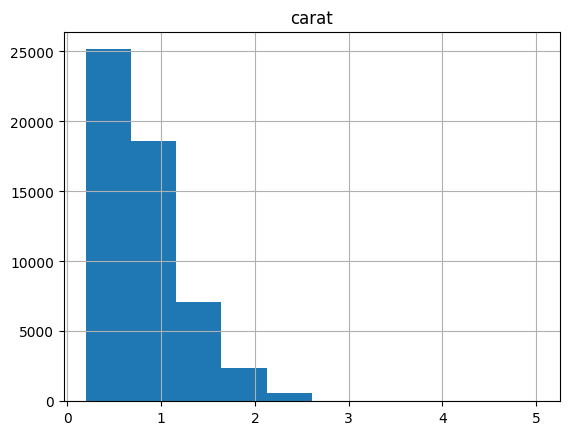

In [29]:
# plot using pandas
df.hist(column = 'carat')

array([[<Axes: title={'center': 'carat'}>]], dtype=object)

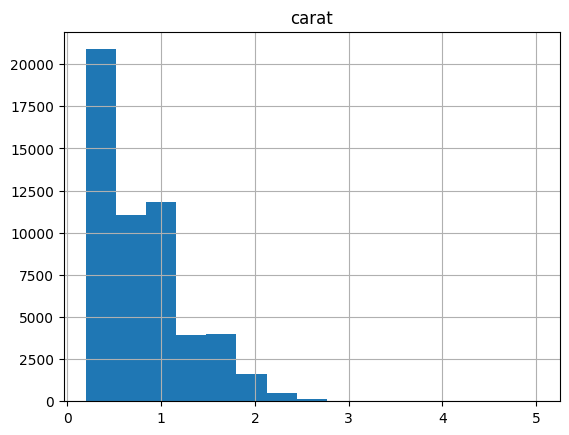

In [30]:
# Create histogram by binning
df.hist(column = 'carat', bins = 15)

<Axes: xlabel='carat', ylabel='Count'>

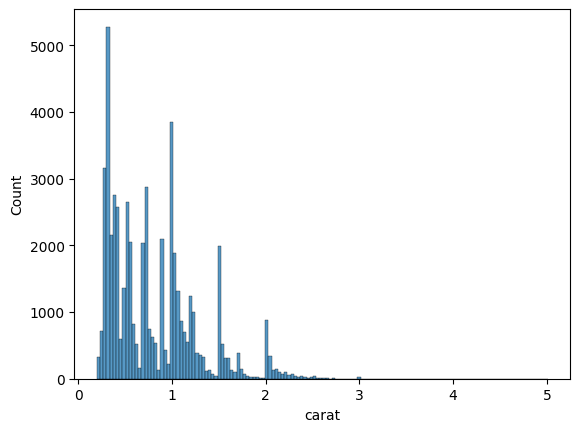

In [31]:
# use seaborn to plot
sns.histplot(data = df['carat'])

<Axes: xlabel='carat', ylabel='Count'>

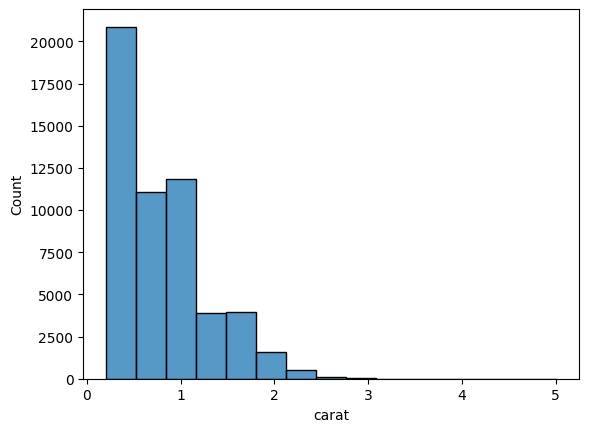

In [32]:
sns.histplot(data = df['carat'], bins = 15)

<Axes: xlabel='carat', ylabel='Count'>

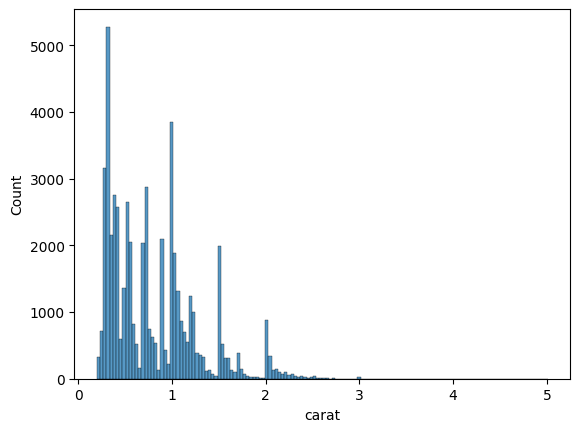

In [33]:
sns.histplot(data = df['carat'], kde = False)

<Axes: xlabel='carat', ylabel='Count'>

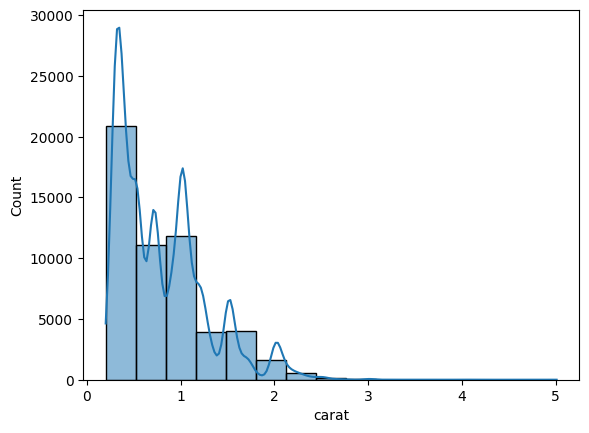

In [34]:
sns.histplot(data = df['carat'], kde = True, bins = 15)

In [35]:
# create a table with counts for 'cut'
cut_count_table = pd.crosstab(index = df['cut'], columns = 'count')
print(cut_count_table)

col_0      count
cut             
Fair        1610
Good        4906
Ideal      21551
Premium    13791
Very Good  12082


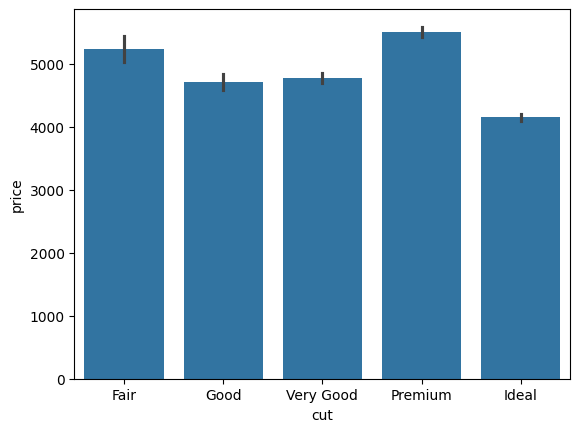

In [36]:
ax = sns.barplot(data = df, x = 'cut', y = 'price',
                 order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

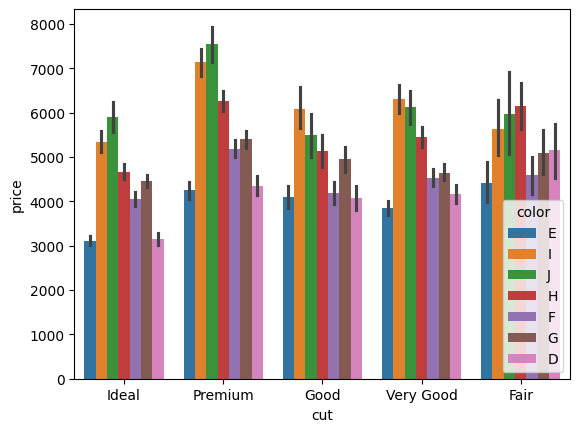

In [37]:
# group by specific features
ax = sns.barplot(data=df, x = 'cut', y = 'price', hue = 'color')

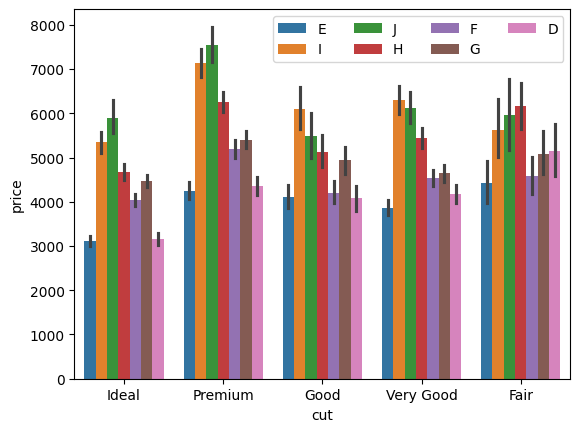

In [38]:
# move legend
ax = sns.barplot(data=df, x = 'cut', y = 'price', hue = 'color')
ax.legend(loc = 'upper right', ncol = 4)

Text(0, 0.5, 'Price')

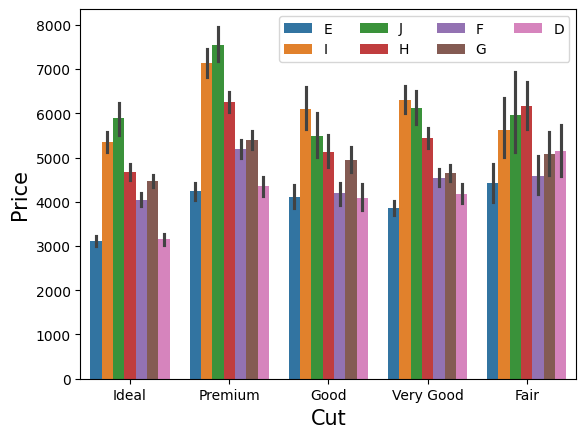

In [39]:
# change the fontsize
ax = sns.barplot(data = df, x = 'cut', y = 'price', hue = 'color')
ax.legend(loc = 'upper right', ncol = 4)
ax.set_xlabel('Cut', fontdict = {'fontsize': 15})
ax.set_ylabel('Price', fontdict = {'fontsize': 15})

/var/folders/gp/2fjqrh9x7xxb3vsdhj8sqp240000gn/T/ipykernel_2537/1206096680.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15, rotation = 30)


[Text(0, 0, 'Ideal'),
 Text(1, 0, 'Premium'),
 Text(2, 0, 'Good'),
 Text(3, 0, 'Very Good'),
 Text(4, 0, 'Fair')]

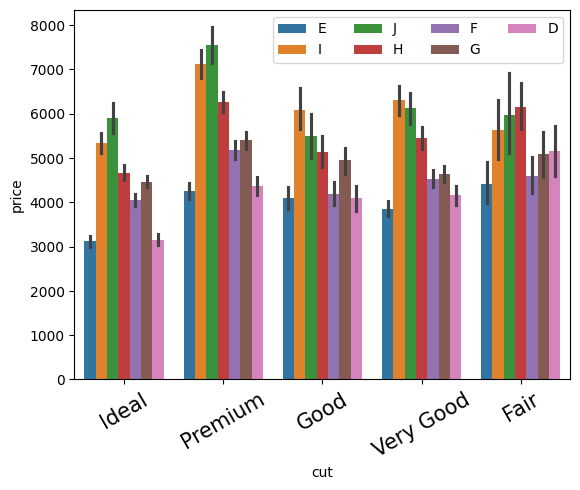

In [40]:
# change the rotation of the labels
ax = sns.barplot(data = df, x = 'cut', y = 'price', hue = 'color')
ax.legend(loc = 'upper right', ncol = 4)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 15, rotation = 30)